In [1]:
from qiskit_aer import AerSimulator
from qiskit import *
import supermarq , os
from qiskit.providers.fake_provider import (FakeRueschlikon)
backend_fake = FakeRueschlikon()
emulator_aer_dm = Aer.get_backend('aer_simulator_density_matrix')

In [2]:
ghz = supermarq.ghz.GHZ(5)
ghz_circuit = ghz.qiskit_circuit()
ghz_circuit.draw()

┌───┐          ┌─┐                      
q_0: ┤ H ├──■───────┤M├──────────────────────
     └───┘┌─┴─┐     └╥┘     ┌─┐              
q_1: ─────┤ X ├──■───╫──────┤M├──────────────
          └───┘┌─┴─┐ ║      └╥┘     ┌─┐      
q_2: ──────────┤ X ├─╫───■───╫──────┤M├──────
               └───┘ ║ ┌─┴─┐ ║      └╥┘┌─┐   
q_3: ────────────────╫─┤ X ├─╫───■───╫─┤M├───
                     ║ └───┘ ║ ┌─┴─┐ ║ └╥┘┌─┐
q_4: ────────────────╫───────╫─┤ X ├─╫──╫─┤M├
                     ║       ║ └───┘ ║  ║ └╥┘
c: 5/════════════════╩═══════╩═══════╩══╩══╩═
                     0       1       2  3  4

In [3]:
job_fake = execute(transpile(ghz_circuit, backend_fake), backend_fake, shots=8192, memory=False)
data_fake =job_fake.result()
job_fake.status()

<JobStatus.DONE: 'job has successfully run'>

In [4]:
job = execute(transpile(ghz_circuit,emulator_aer_dm), emulator_aer_dm, shots=8192, memory=False)
data =job.result()
job.status()

<JobStatus.DONE: 'job has successfully run'>

In [5]:
counts = job.result().get_counts()
print(counts)
counts_fake = job_fake.result().get_counts()
print(counts_fake)

{'11111': 4086, '00000': 4106}
{'11111': 4131, '00000': 4061}


In [6]:
score_fake = ghz.score(counts_fake)
print(score_fake)

0.9999817457443197


In [7]:
score = ghz.score(counts)
print(score)

0.9999985098816602


[0.4, 1.0, 0.8, 0.4666666666666667, 0.0, 0.0]
--------------------------------------------------------------


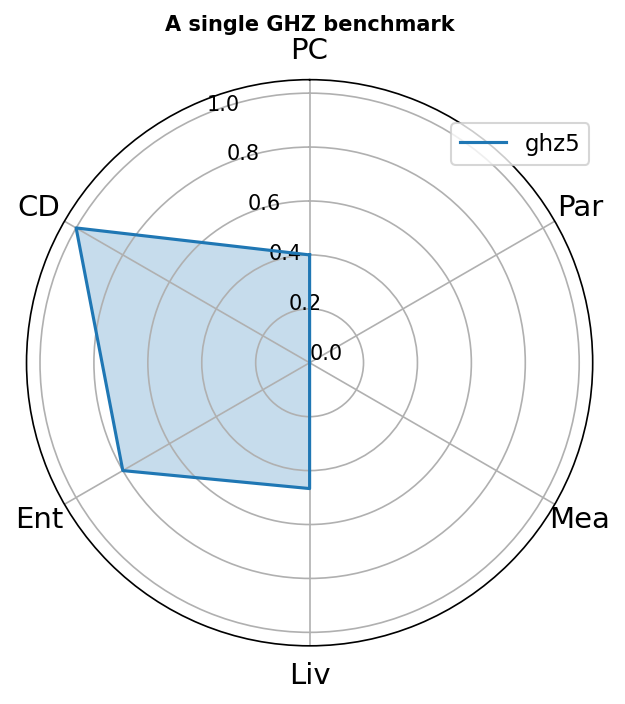

In [8]:
ghz_features = [supermarq.converters.compute_communication_with_qiskit(ghz_circuit),
                supermarq.converters.compute_depth_with_qiskit(ghz_circuit),
                supermarq.converters.compute_entanglement_with_qiskit(ghz_circuit),
                supermarq.converters.compute_liveness_with_qiskit(ghz_circuit),
                supermarq.converters.compute_measurement_with_qiskit(ghz_circuit),
                supermarq.converters.compute_parallelism_with_qiskit(ghz_circuit),]
print(ghz_features)
print("--------------------------------------------------------------")
supermarq.plotting.plot_benchmark(
    ["A single GHZ benchmark", ["ghz5"], [ghz_features]],
    spoke_labels=["PC", "CD", "Ent", "Liv", "Mea", "Par"],
)

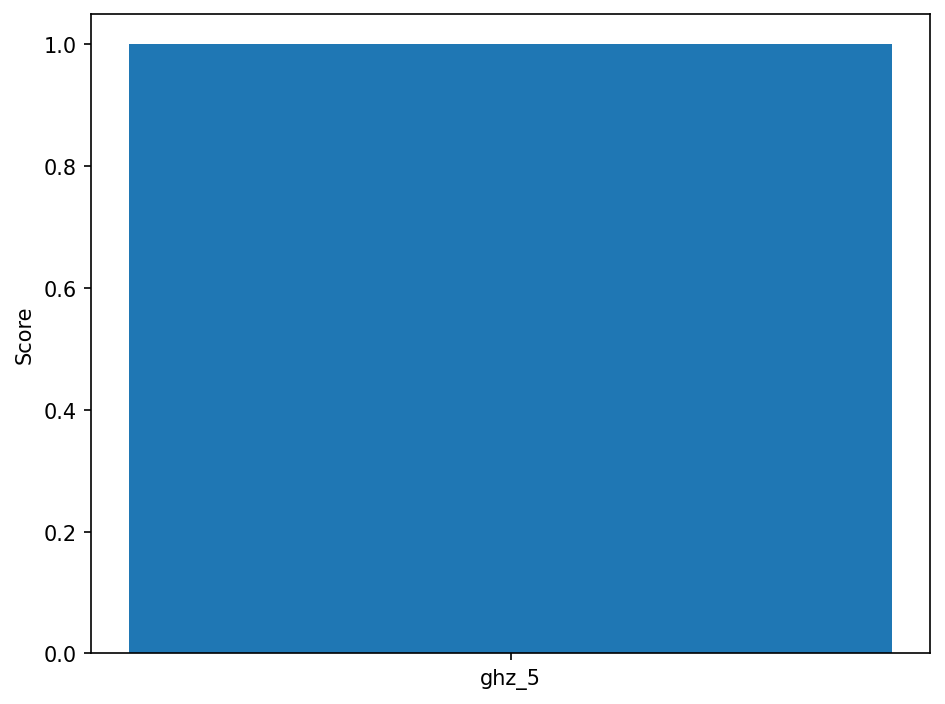

In [9]:
supermarq.plotting.plot_results([score], ["ghz_5"])

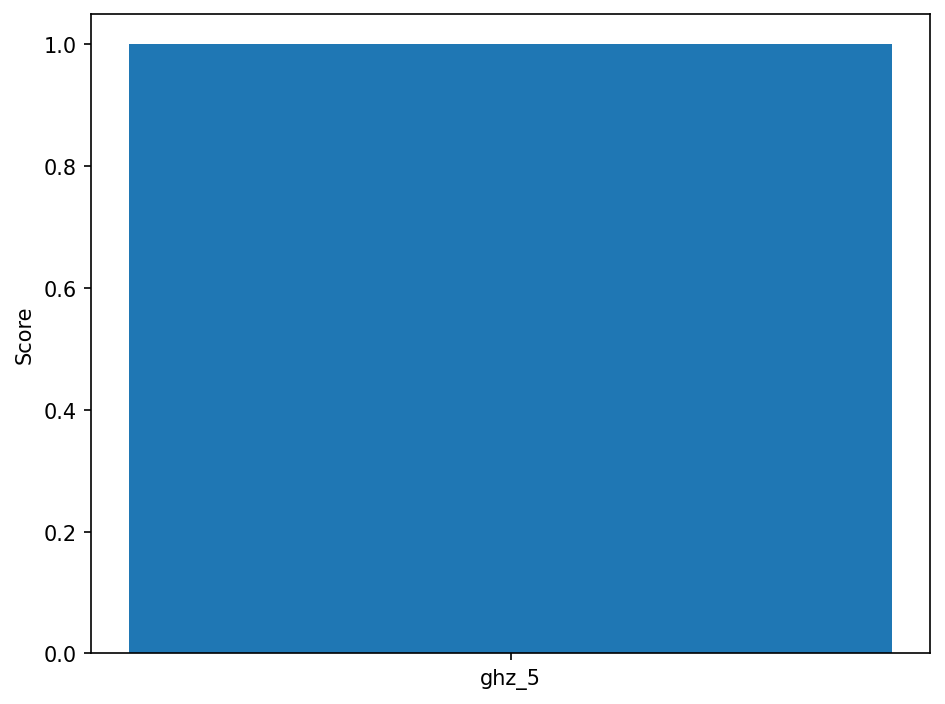

In [10]:
supermarq.plotting.plot_results([score_fake], ["ghz_5"])

In [11]:
benchmark_features = {}
benchmarks = [(supermarq.ghz.GHZ(5), "ghz5"),(supermarq.ghz.GHZ(6), "ghz6"),]
for benchmark, label in benchmarks:
    benchmark_features[label] = [
        supermarq.converters.compute_communication_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_depth_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_entanglement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_liveness_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_measurement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_parallelism_with_qiskit(benchmark.qiskit_circuit()),]
print(benchmark_features)

{'ghz5': [0.4, 1.0, 0.8, 0.4666666666666667, 0.0, 0], 'ghz6': [0.3333333333333333, 1.0, 0.8333333333333334, 0.40476190476190477, 0.0, 0]}


In [12]:
jobs = []
for benchmark, label in benchmarks:
    job_dm = emulator_aer_dm.run(benchmark.qiskit_circuit(), shots=1000)
    jobs.append((label, job_dm, benchmark))
jobs

[('ghz5',
  <supermarq.benchmarks.ghz.GHZ at 0x7ec4da627f70>),
 ('ghz6',
  <supermarq.benchmarks.ghz.GHZ at 0x7ec4da627760>)]

In [13]:
jobs_fake = []
for benchmark, label in benchmarks:
    job_fake = backend_fake.run(benchmark.qiskit_circuit(), shots=1000)
    jobs_fake.append((label, job_fake, benchmark))
jobs_fake

[('ghz5',
  <supermarq.benchmarks.ghz.GHZ at 0x7ec4da627f70>),
 ('ghz6',
  <supermarq.benchmarks.ghz.GHZ at 0x7ec4da627760>)]

In [14]:
device_scores = {}
for label, job, benchmark in jobs:
    counts = job.result(0).get_counts()
    print(counts)
    score = benchmark.score(counts)
    print(score)
    device_scores[label] = score

{'00000': 472, '11111': 528}
0.9992153843783264
{'000000': 513, '111111': 487}
0.9998309714293423


In [15]:
device_scores_fake = {}
for label, job, benchmark in jobs_fake:
    counts_fake = job.result(0).get_counts()
    print(counts_fake)
    score_fake = benchmark.score(counts_fake)
    print(score_fake)
    device_scores_fake[label] = score_fake

{'00000': 493, '11111': 507}
0.9999509975987646
{'000000': 488, '111111': 512}
0.9998559792580258


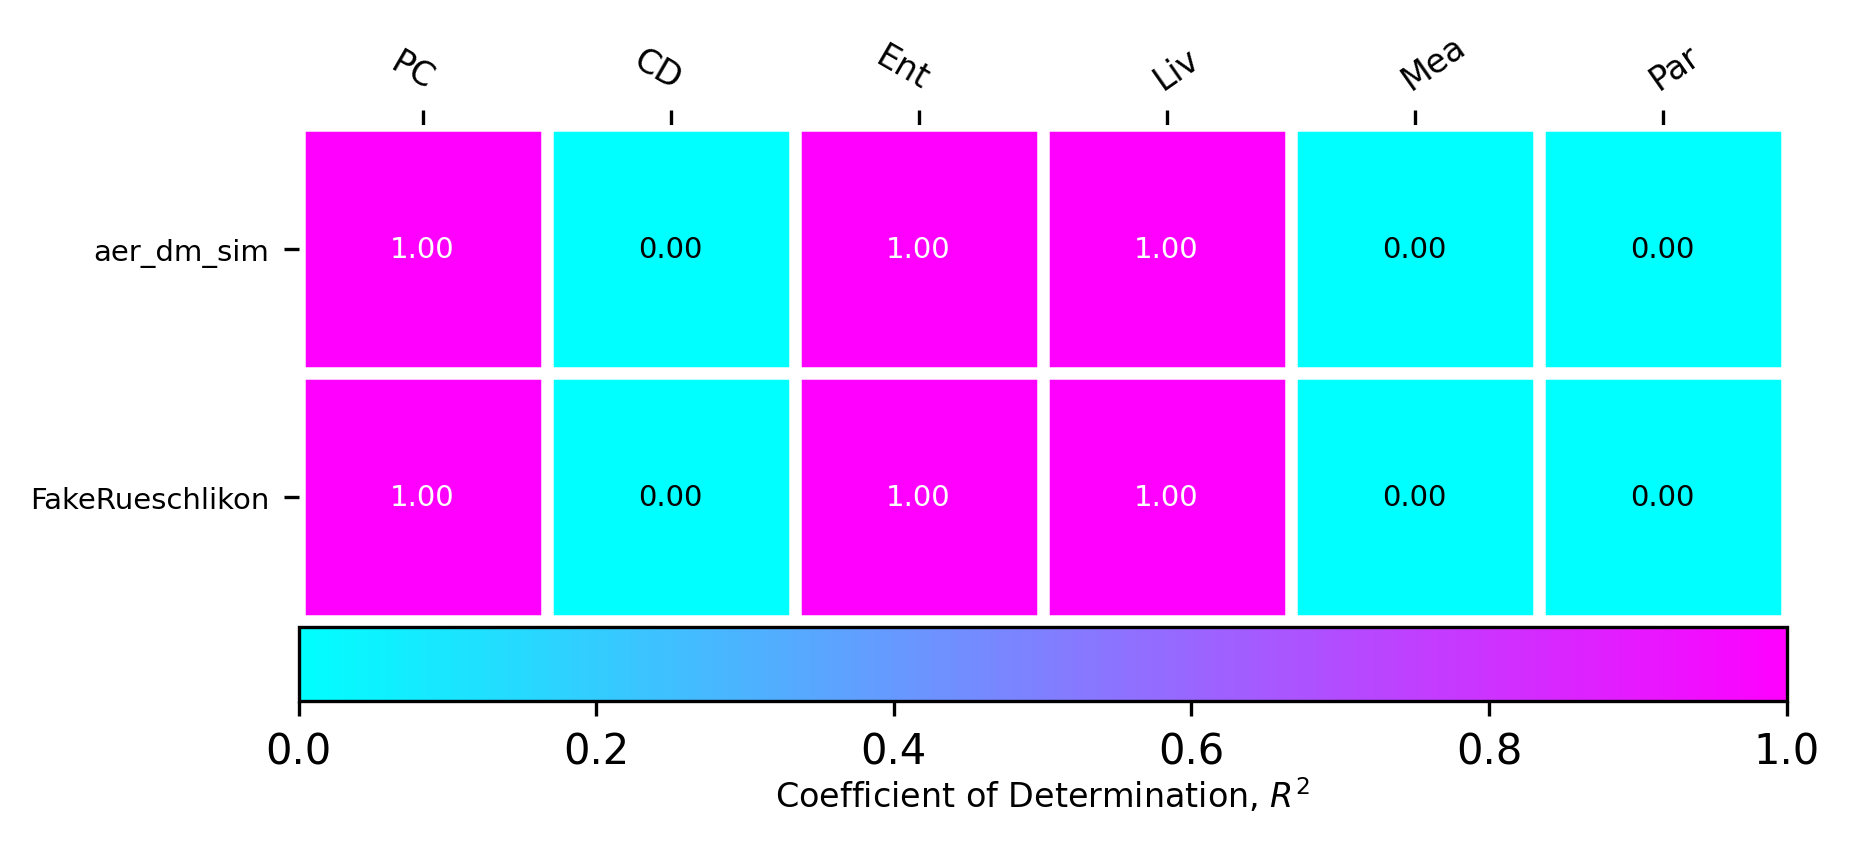

In [20]:
supermarq.plotting.plot_correlations(
        benchmark_features,
        [device_scores, device_scores_fake],
        ["PC", "CD", "Ent", "Liv", "Mea", "Par"],
        device_name=["aer_dm_sim", "FakeRueschlikon"],
        show=True,
    )